# IADS NetworkX Tutorial

In this tutorial we will cover some of the commonly used features of NetworkX and the general workflow of constructing a graph. We will use a dataset of character co-occurrences in Lord of the Rings. In this dataset, the nodes are characters and edges represent co-occurrence within the same sentence in the books.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

## Reading in a dataset to construct a graph

The dataset is called `lotr.csv` and it has 3 columns, the first two being the two characters and the third being the sentence in which they co-occur.

In [5]:
df = pd.read_csv("lotr.csv", names = ["source","target","time"])
display(df)

,source,target,time
0,Gandalf,Elrond,33
1,Frodo,Bilbo,114
2,Blanco,Marcho,146
3,Frodo,Bilbo,205
4,Thorin,Gandalf,270
...,...,...,...
2644,Merry,Galadriel,32666
2645,Merry,Sam,32666
2646,Galadriel,Sam,32666
2647,Pippin,Merry,32671


In this "nice" format, we can read this directly into networkx as a simple undirected graph using the `from_pandas_edgelist` function.

In [70]:
G = nx.from_pandas_edgelist(df)

## The Graph object

The NetworkX graph object is equipped with many basic query functions to ask basic questions about the graph.

### Number of nodes and edges

In [8]:
n, m = len(G.nodes()), len(G.edges())

print("Number of Nodes: "+str(n)+", Number of Edges: "+str(m))

Number of Nodes: 139, Number of Edges: 634


### Who is connected to whom

Basic queries about whether two nodes are connected are possible via has_edge

In [15]:
print(G.has_edge("Frodo","Pippin"))
print(G.has_edge("Arwen","Pippin"))

True
False


### Neighbours
Extract the neighbours of a given node. Careful, they use US not UK spelling of neighbour! ;) 

In [17]:
print(list(G.neighbors("Gandalf")))

['Elrond', 'Thorin', 'Bilbo', 'Frodo', 'Sam', 'Merry', 'Fredegar', 'Tom', 'Pippin', 'Nob', 'Barliman', 'Glorfindel', 'Boromir', 'Galdor', 'Glóin', 'Gollum', 'Isildur', 'Saruman', 'Aragorn', 'Legolas', 'Gimli', 'Bill', 'Sauron', 'Fëanor', 'Peregrin', 'Daeron', 'Shadowfax', 'Treebeard', 'Galadriel', 'Wormtongue', 'Thengel', 'Helm', 'Erkenbrand', 'Faramir', 'Denethor', 'Beregond', 'Dúnhere', 'Hirgon', 'Éomer', 'Ecthelion', 'Amroth', 'Éowyn', 'Meriadoc', 'Imrahil', 'Meneldor', 'Nimloth', 'Samwise', 'Butterbur', 'Lotho']


### Iterating through nodes and edges: 

The Graph object allows you to iterate through both nodes and edges, in fact many algorithms you implement yourself might require you to do so.

In [18]:
for n in G.nodes:
    print(str(n)+": "+str(G.degree(n)))

Gandalf: 49
Elrond: 32
Frodo: 51
Bilbo: 21
Blanco: 1
Marcho: 1
Thorin: 3
Gollum: 14
Samwise: 11
Peregrin: 22
Elessar: 9
Arwen: 14
Aragorn: 45
Barahir: 4
Faramir: 29
Findegil: 1
Meriadoc: 17
Elendil: 16
Galadriel: 19
Celeborn: 10
Hamfast: 3
Merry: 34
Odo: 1
Pippin: 34
Fredegar: 6
Sam: 28
Halfast: 1
Saruman: 18
Isildur: 18
Gil-galad: 7
Sauron: 17
Sméagol: 2
Déagol: 3
Lobelia: 3
Lotho: 6
Maggot: 4
Goldberry: 2
Tom: 9
Butterbur: 10
Barliman: 3
Nob: 4
Bob: 3
Bill: 7
Lúthien: 14
Beren: 15
Thingol: 7
Elwing: 5
Eärendil: 6
Dior: 5
Glorfindel: 13
Glóin: 13
Beorn: 2
Grimbeorn: 2
Bard: 2
Bain: 2
Brand: 2
Dwalin: 3
Bombur: 3
Bofur: 3
Ori: 3
Balin: 10
Óin: 2
Smaug: 1
Gimli: 25
Galdor: 7
Erestor: 7
Círdan: 5
Legolas: 25
Thranduil: 2
Boromir: 18
Anárion: 4
Valandil: 5
Ohtar: 3
Meneldil: 1
Denethor: 19
Celebrimbor: 1
Radagast: 1
Thrór: 1
Túrin: 3
Hador: 3
Húrin: 8
Fundin: 1
Fëanor: 1
Daeron: 1
Orophin: 1
Rúmil: 2
Haldir: 9
Amroth: 16
Celebrían: 1
Thengel: 17
Shadowfax: 12
Treebeard: 7
Wormtongue: 6
He

In [20]:
for e in G.edges():
    print(G.degree(e[0])*G.degree(e[1]))

1568
147
1029
2499
1372
1666
294
441
1666
196
147
637
882
343
637
686
882
882
2205
1225
1225
343
833
49
1078
49
588
343
931
294
833
931
245
1421
931
588
392
98
931
245
784
637
833
882
49
98
539
490
294
672
896
416
1440
1632
448
448
192
224
224
160
576
544
224
576
512
64
1088
608
288
608
928
608
288
800
416
512
576
800
704
320
1071
561
1734
51
918
714
1428
1734
306
153
306
204
1122
867
102
459
510
663
714
714
663
102
102
2295
357
918
765
1275
1275
510
816
459
969
918
816
153
1479
969
204
204
153
612
918
255
255
612
153
306
357
63
294
21
63
714
714
462
84
189
210
21
588
378
315
294
210
945
294
1
39
252
42
630
266
28
350
392
406
42
70
476
198
495
308
33
319
374
132
275
275
198
374
352
748
748
132
616
550
396
264
418
110
264
396
550
990
418
132
144
162
45
405
81
72
261
126
630
196
14
182
98
266
140
224
406
252
585
810
720
810
855
765
1260
1530
1125
1125
1530
405
450
450
855
540
765
225
810
270
1305
540
405
1350
855
45
585
810
765
45
585
720
225
225
90
315
116
56
60
28
812
551
116
116
522
8

## Visualisation

The most basic function for drawing a graph is `nx.draw()`. What comes out, especially for large graphs, may initially be disappointing.

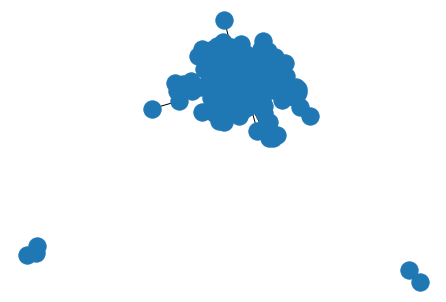

In [21]:
nx.draw(G)

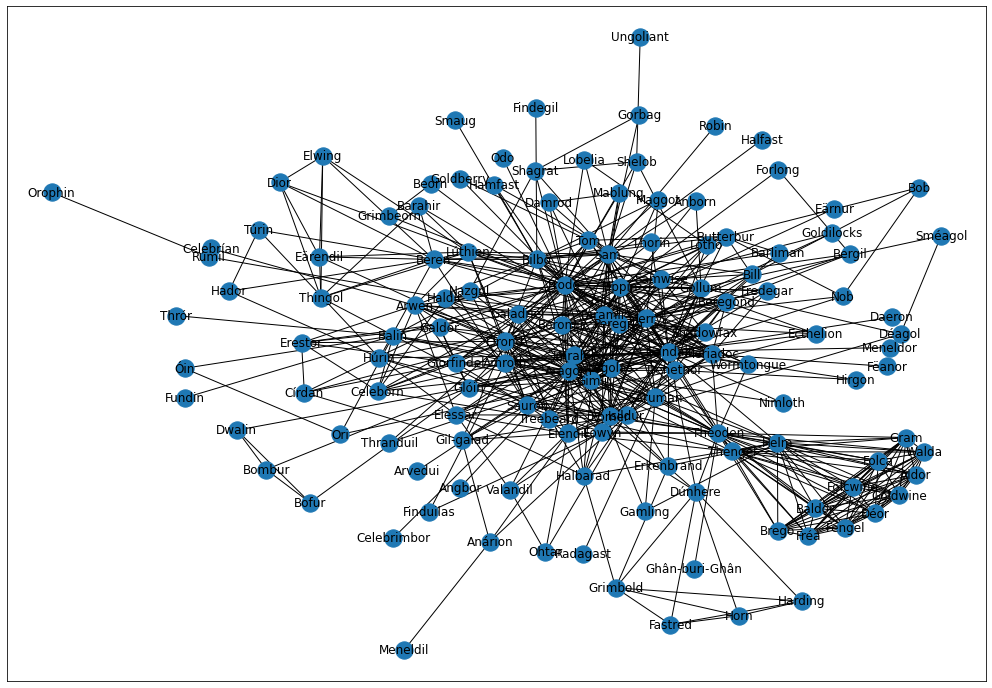

In [116]:
fig, ax = plt.subplots(figsize=(1.5*11.69,1.5*8.27))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
pos = nx.kamada_kawai_layout(G0,scale=50)
nx.draw_networkx_nodes(G0,pos)
nx.draw_networkx_edges(G0,pos)
nx.draw_networkx_labels(G0,pos)
plt.show()

## Degree and Centrality

NetworkX has built-in ways of measuring centrality of nodes.

In [118]:
df2 = pd.DataFrame(G0.nodes(),columns=["nodes"])
#df2 = df2.set_index("nodes")
degrees = nx.degree_centrality(G0)
eigen = nx.eigenvector_centrality(G0)
betweenness = nx.betweenness_centrality(G0)
closeness = nx.closeness_centrality(G0)


df2["degree"]=df2.apply(lambda row: degrees[row[0]],axis=1)
df2["eigen"]=df2.apply(lambda row: eigen[row[0]],axis=1)
df2["betweenness"]=df2.apply(lambda row: betweenness[row[0]],axis=1)
df2["closeness"]=df2.apply(lambda row: closeness[row[0]],axis=1)

df2 = df2.sort_values(by="degree", ascending=False)
df2.head(10)

,nodes,degree,eigen,betweenness,closeness
2,Frodo,0.383459,0.273796,0.185392,0.568376
0,Gandalf,0.368421,0.274853,0.175620,0.575758
10,Aragorn,0.338346,0.278087,0.125148,0.573276
21,Pippin,0.255639,0.228864,0.049644,0.507634
19,Merry,0.255639,0.218573,0.060905,0.532000
1,Elrond,0.240602,0.210302,0.052610,0.501887
101,Théoden,0.225564,0.142127,0.116814,0.478417
12,Faramir,0.218045,0.192966,0.054716,0.503788
23,Sam,0.210526,0.181230,0.068476,0.490775
58,Gimli,0.187970,0.189561,0.038462,0.505703


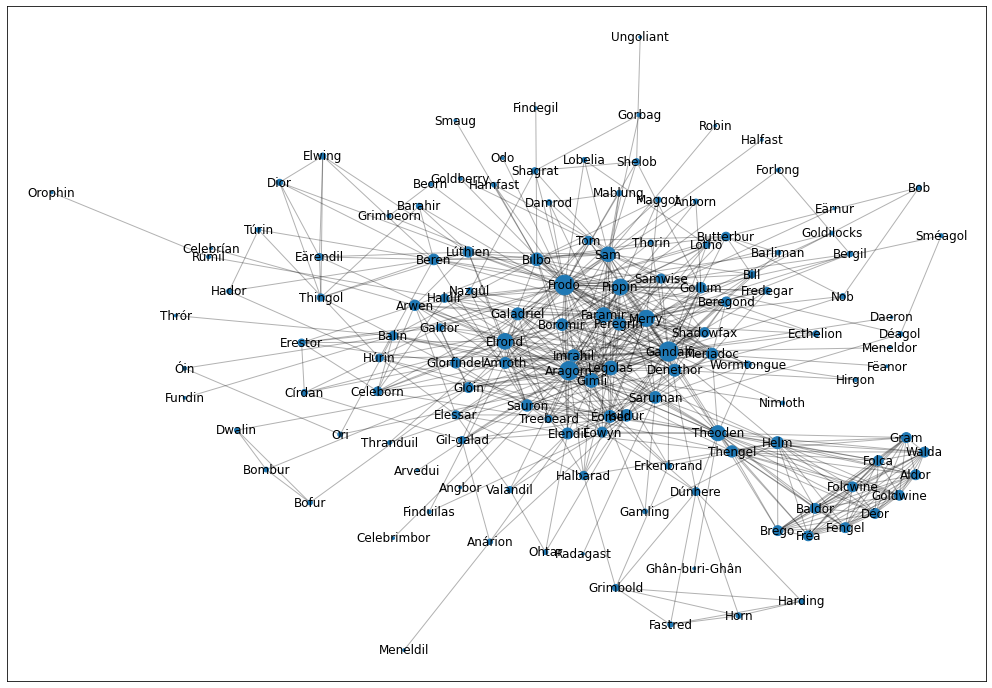

In [117]:
fig, ax = plt.subplots(figsize=(1.5*11.69,1.5*8.27))
nx.draw_networkx_nodes(G0,pos, nodelist = df2.nodes, node_size=1000*df2.degree)
nx.draw_networkx_edges(G0,pos,alpha=0.3)
nx.draw_networkx_labels(G0,pos)
plt.show()

## Paths and spreading

There are various ways of looking at the way information might flow on the network.

In [121]:
print(nx.shortest_path(G,'Orophin','Harding'))

['Orophin', 'Rúmil', 'Haldir', 'Legolas', 'Erkenbrand', 'Grimbold', 'Harding']


## Communities

In [126]:
import community as community_louvain
import seaborn as sns
import itertools
palette = itertools.cycle(sns.color_palette())

In [127]:
partition = community_louvain.best_partition(G0)

fig, ax = plt.subplots(figsize=(1.5*11.69,1.5*8.27))
nx.draw_networkx_nodes(G0,pos, nodelist = df2.nodes, node_size=1000*df2.degree)
nx.draw_networkx_edges(G0,pos,alpha=0.3)
nx.draw_networkx_labels(G0,pos)

for i in range(max(partition.values())):
    nl = [node for node in partition if partition[node]==i]
    size = [df2.degree]

IndentationError: expected an indented block (<ipython-input-127-e909bddf3998>, line 5)

## Bonus